Import required libaries

In [4]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

Connect to my SQL Database AdventureWorks 2019

In [5]:
sqlServer = pyodbc.connect('Driver={SQL Server};' # server type 
                      'Server=USER-PC\SQLSERVER1;' # location and name of the server
                      'Database=AdventureWorks2019;' # The database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # Skips security phase as it's a database in my own PC

Use the SQL Query I created in SSMS to use for visualization called query

query = Ordered by squarefeet to help with initial visualisations
query2 = Ordered by NumberEmployees to help with initial visualisations
query3 = employee and store size data only for stores with 300k annual revenue (max recorded in database)

In [6]:
query = '''SELECT SquareFeet, NumberEmployees, AnnualRevenue 
            FROM Sales.vStoreWithDemographics
            ORDER BY SquareFeet;'''

query2 = '''SELECT SquareFeet, NumberEmployees, AnnualRevenue 
            FROM Sales.vStoreWithDemographics
            ORDER BY NumberEmployees;'''

query3 = '''SELECT SquareFeet, NumberEmployees, AnnualRevenue 
                    FROM Sales.vStoreWithDemographics
                    WHERE AnnualRevenue = 300000'''

Storing the Results of the query into variable name storeSize_vs_NoEmployees_vs_Revenue

This variable is a pandas dataframe due to "pd.read_sql"

second query for better initial linegraph with number employee vs AnnualRevenue

third query uses variable name "boxHist300k" as the data will be used to make boxplots and histograms

In [7]:
storeSize_vs_NoEmployees_vs_Revenue = pd.read_sql(query, sqlServer)

noEmployees_vs_Revenue = pd.read_sql(query2, sqlServer)

boxHist300k = pd.read_sql(query3, sqlServer)

C:\Users\user\AppData\Local\Temp\ipykernel_32212\1712202873.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  storeSize_vs_NoEmployees_vs_Revenue = pd.read_sql(query, sqlServer)
C:\Users\user\AppData\Local\Temp\ipykernel_32212\1712202873.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  noEmployees_vs_Revenue = pd.read_sql(query2, sqlServer)
C:\Users\user\AppData\Local\Temp\ipykernel_32212\1712202873.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  boxHist300k = pd.read_sql(query3, sqlServer)


Double Checking if the inserted Queries Gave the correct output

In [8]:
print(storeSize_vs_NoEmployees_vs_Revenue.head())
print(noEmployees_vs_Revenue.head())
print(boxHist300k.head())

   SquareFeet  NumberEmployees  AnnualRevenue
0        6000                4        30000.0
1        6000                4        30000.0
2        6000                2        30000.0
3        6000                2        30000.0
4        6000                5        30000.0
   SquareFeet  NumberEmployees  AnnualRevenue
0        6000                2        30000.0
1       10000                2        30000.0
2        6000                2        30000.0
3       10000                2        30000.0
4        7000                2        30000.0
   SquareFeet  NumberEmployees  AnnualRevenue
0       72000               66       300000.0
1       68000               52       300000.0
2       73000               55       300000.0
3       69000               58       300000.0
4       72000               61       300000.0


Showing:
- initial relationship between Store Size and Annual Revenue, 
- initial relationship between Number of Employees and Annual Revenue 
- initial relationship between Store Size and Number of Employees

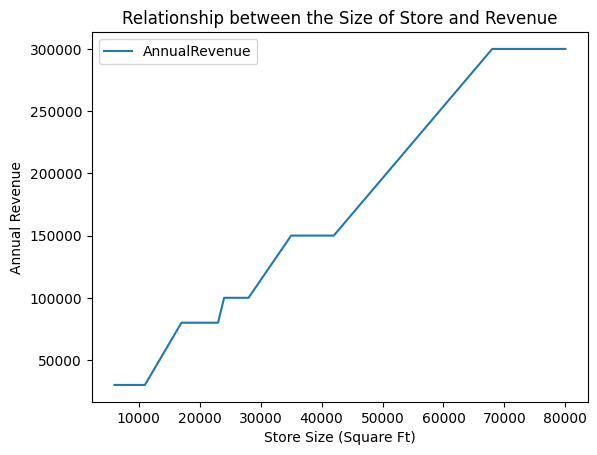

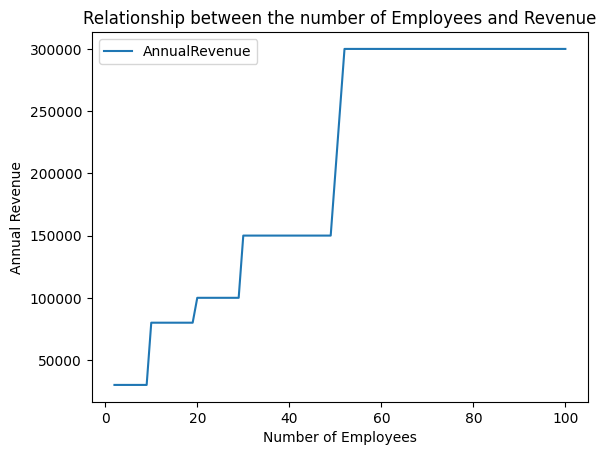

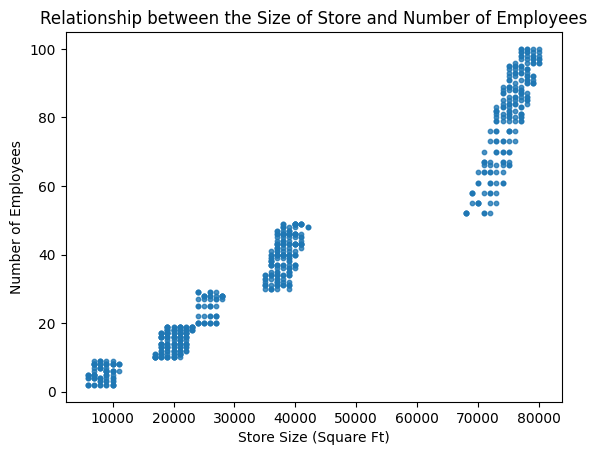

In [9]:
storeSize_vs_NoEmployees_vs_Revenue.plot('SquareFeet','AnnualRevenue')
plt.xlabel('Store Size (Square Ft)')
plt.ylabel('Annual Revenue')
plt.title('Relationship between the Size of Store and Revenue')
plt.show()

noEmployees_vs_Revenue.plot('NumberEmployees','AnnualRevenue')
plt.xlabel('Number of Employees')
plt.ylabel('Annual Revenue')
plt.title('Relationship between the number of Employees and Revenue')
plt.show()

storeSize_vs_NoEmployees_vs_Revenue.plot.scatter('SquareFeet','NumberEmployees', s = 10, alpha = 0.8)
plt.xlabel('Store Size (Square Ft)')
plt.ylabel('Number of Employees')
plt.title('Relationship between the Size of Store and Number of Employees')
plt.show()

- Preparing the data from 3 columns for ease of use when creating the upcoming scatterplots
- Preparing Code for Trendling and Correlation Coefficient Variable

In [10]:
#Turning the Annual Revenue column into a numpy array to resize the dots in scatterplot
annualRevenue = np.array(storeSize_vs_NoEmployees_vs_Revenue['AnnualRevenue'])

#Adding the other columns into a variable for easier access
squareFeet = storeSize_vs_NoEmployees_vs_Revenue['SquareFeet']
numberEmployees = storeSize_vs_NoEmployees_vs_Revenue['NumberEmployees']

#block of code below is to prepare the code to create a linear trendline that will be used for all 3 plots
#code to add trendline: plt.plot(main_x,main_p(main_x), "r--")
polyfit = np.polyfit(squareFeet, numberEmployees, 1)
line = np.poly1d(polyfit)

#calculating the correlation coefficient and rounding it to 4 decimal places
correlation = np.corrcoef(squareFeet, numberEmployees)[0,1]
roundedCorrelation = round(correlation, 4)

Scatterplot with logarithmic scale added to the x axis

C:\Users\user\AppData\Local\Temp\ipykernel_32212\1203918005.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])


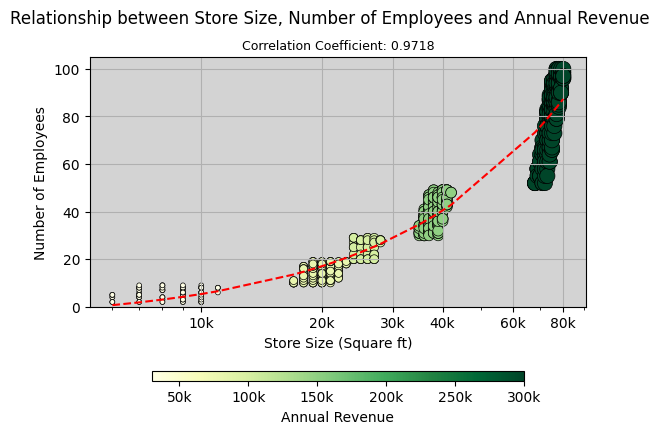

In [11]:
#block of code below is the full scatterplot with all data
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor('lightgray') #these 2 lines sets the background for the plot, to make coloured dots easier to see

#initial scatterplot
plt.scatter(squareFeet, numberEmployees, s = annualRevenue/2500, c = annualRevenue, cmap = 'YlGn', edgecolors='black', linewidths=0.5)

#these lines creates a colorbar and labels it as the 3rd variable, AnnualRevenue and changes size
cb = plt.colorbar(orientation = 'horizontal', aspect = 40, shrink = 0.75, pad = 0.175)
cb.set_label('Annual Revenue')
cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])

#plt.xlim(0)
plt.ylim(0) #makes minimum of the graph to 0,0 

plt.plot(squareFeet,line(squareFeet), "r--") #only need this line to plot the trendline coloured red and dashed line from argument "r--"
plt.suptitle('Relationship between Store Size, Number of Employees and Annual Revenue')
plt.title('Correlation Coefficient: '+str(roundedCorrelation), fontsize = 9)

plt.xlabel('Store Size (Square ft)')
plt.xscale('log')
plt.xticks([10000,20000,30000,40000,60000,80000], ['10k', '20k','30k','40k','60k','80k'])

plt.ylabel('Number of Employees')
plt.grid()
plt.show()

I create 3 more scatterplots with varying Circle size based off of Annual Revenue with X axis = Store Size, Y axis = Number of Employees
- 1st Scatterplot = Contains all available Data
- 2nd Scatterplot = contains data within Store sizes 0 and 50,000 for easier visuals
- 3rd Scatterplot = contains data within Store sizes 50,000+ for easier visuals and emphasis on what gives highest revenue

1st Scatterplot

C:\Users\user\AppData\Local\Temp\ipykernel_32212\3142121091.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])


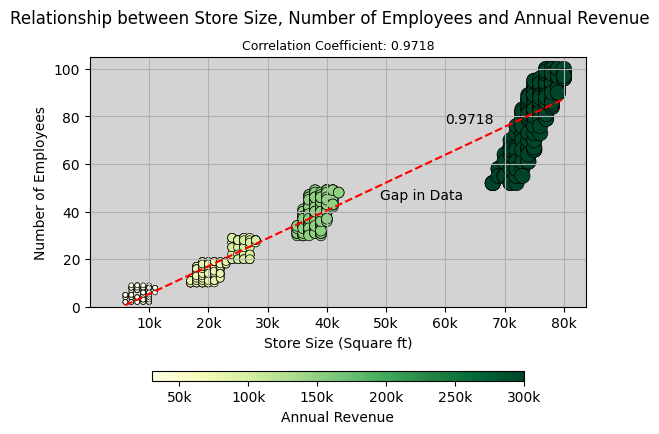

In [12]:
#block of code below is the full scatterplot with all data
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor('lightgray') #these 2 lines sets the background for the plot, to make coloured dots easier to see

#initial scatterplot
plt.scatter(squareFeet, numberEmployees, s = annualRevenue/2500, c = annualRevenue, cmap = 'YlGn', edgecolors='black', linewidths=0.5)

#these lines creates a colorbar and labels it as the 3rd variable, AnnualRevenue and changes size
cb = plt.colorbar(orientation = 'horizontal', aspect = 40, shrink = 0.75, pad = 0.175)
cb.set_label('Annual Revenue')
cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])

plt.xlim(0)
plt.ylim(0) #makes minimum of the graph to 0,0 

plt.plot(squareFeet,line(squareFeet), "r--") #only need this line to plot the trendline coloured red and dashed line from argument "r--"
plt.suptitle('Relationship between Store Size, Number of Employees and Annual Revenue')
plt.title('Correlation Coefficient: '+str(roundedCorrelation), fontsize = 9)

plt.xlabel('Store Size (Square ft)')
plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000], ['10k', '20k','30k','40k','50k','60k','70k','80k']) #makes X axis more readable

plt.ylabel('Number of Employees')
plt.text(49000, 45, "Gap in Data")
plt.text(60000, 77, str(roundedCorrelation))
plt.grid()
plt.show()

2nd Scatterplot

C:\Users\user\AppData\Local\Temp\ipykernel_32212\1336666607.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])


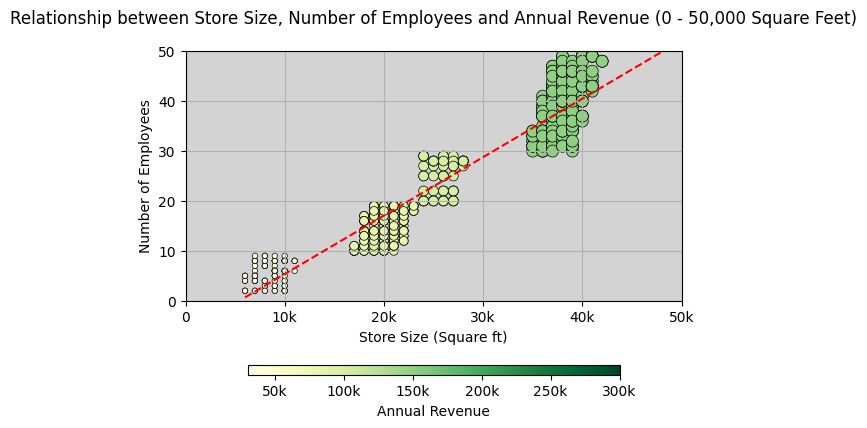

In [13]:
#block of code below only shows data from Stores with size 0 to 50,000 square feet 
ax = plt.axes()
ax.set_facecolor('lightgray')
plt.scatter(squareFeet, numberEmployees, s = annualRevenue/2000, c = annualRevenue, cmap = 'YlGn', edgecolors='black', linewidths=0.5)
cb = plt.colorbar(orientation = 'horizontal', aspect = 40, shrink = 0.75, pad = 0.175)
cb.set_label('Annual Revenue')
cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])
plt.xlim(0,50000)
plt.ylim(0,50)
plt.plot(squareFeet,line(squareFeet), "r--")
plt.title('Relationship between Store Size, Number of Employees and Annual Revenue (0 - 50,000 Square Feet)', pad = 20)
plt.xlabel('Store Size (Square ft)')
plt.xticks([0,10000,20000,30000,40000,50000], ['0','10k', '20k','30k','40k','50k'])
plt.ylabel('Number of Employees')
plt.grid()
plt.show()

3rd Scatterplot

C:\Users\user\AppData\Local\Temp\ipykernel_32212\1559398734.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])


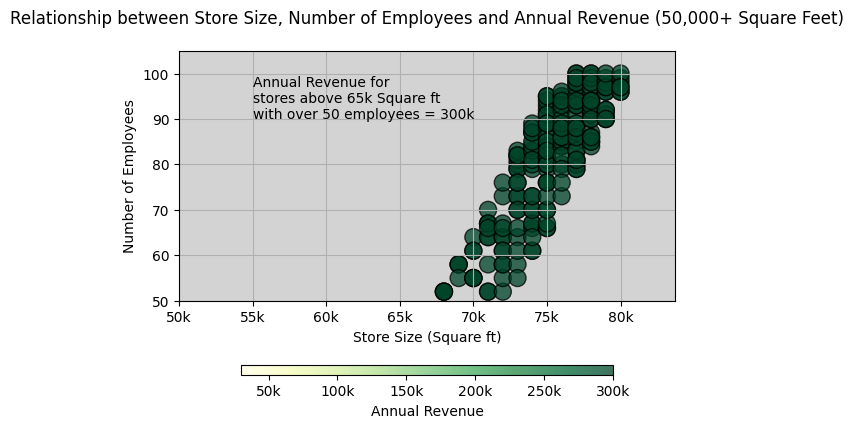

In [23]:
#block of code below only shows data from Stores with size above 50,000 square feet
ax = plt.axes()
ax.set_facecolor('lightgray')
plt.scatter(squareFeet, numberEmployees, s = annualRevenue/2000, c = annualRevenue, cmap = 'YlGn', edgecolors='black', linewidths=1)
cb = plt.colorbar(orientation = 'horizontal', aspect = 40, shrink = 0.75, pad = 0.175)
cb.set_label('Annual Revenue')
cb.set_ticklabels(['0k','50k','100k','150k','200k','250k','300k'])
plt.xlim(50000)
plt.ylim(50)
plt.title('Relationship between Store Size, Number of Employees and Annual Revenue (50,000+ Square Feet)', pad = 20)
plt.xlabel('Store Size (Square ft)')
plt.xticks([50000, 55000, 60000, 65000, 70000, 75000, 80000], ['50k','55k','60k','65k','70k','75k','80k'])
plt.ylabel('Number of Employees')
plt.text(55000,90, "Annual Revenue for\nstores above 65k Square ft\nwith over 50 employees = 300k")
plt.grid()
plt.show()

The next 4 blocks of code will be 2 pairs of plots, 2 histograms and 2 box plots each for number of employees and store size within the 300k annual revenue bracket and look for the most common occurence and distributions to help the CEO make a safer decision when deciding the employee size to store size ratio to ensure the 300k annual revenue

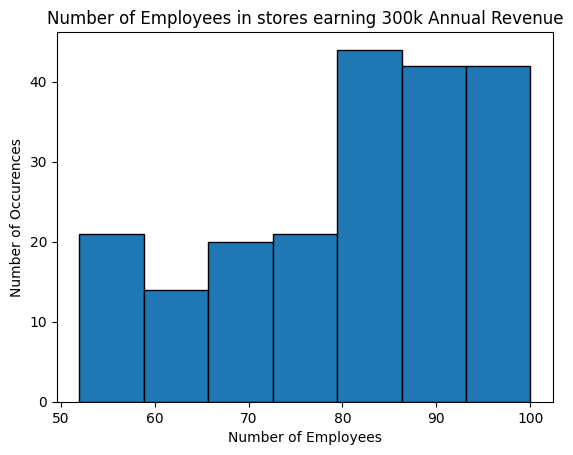

In [15]:
plt.hist(boxHist300k['NumberEmployees'], bins=7, edgecolor = 'black')
plt.title('Number of Employees in stores earning 300k Annual Revenue')
plt.ylabel('Number of Occurences')
plt.xlabel('Number of Employees')
plt.show()

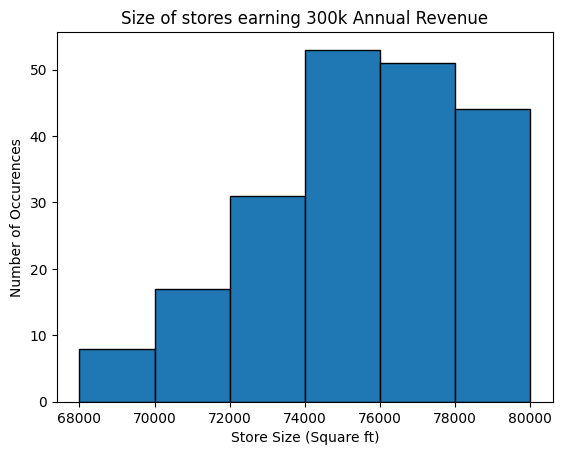

In [16]:
plt.hist(boxHist300k['SquareFeet'], bins=6, edgecolor = 'black')
plt.title('Size of stores earning 300k Annual Revenue')
plt.ylabel('Number of Occurences')
plt.xlabel('Store Size (Square ft)')
plt.show()

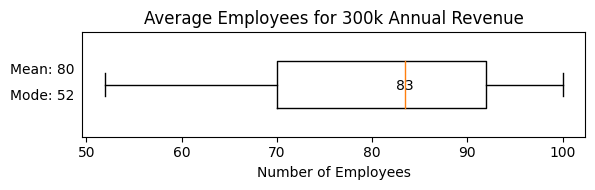

In [17]:
fig = plt.figure(figsize = (6,2))
subplot = fig.add_subplot(111)
subplot.boxplot(boxHist300k['NumberEmployees'], vert = 0, widths=0.45)
plt.title('Average Employees for 300k Annual Revenue')
plt.xlabel('Number of Employees')
plt.tick_params(left = False, labelleft = False)
plt.text(82.5,0.95, int(stats.median(boxHist300k['NumberEmployees'])))
plt.text(42, 1.1, 'Mean: '+str(int(stats.mean(boxHist300k['NumberEmployees']))))
plt.text(42, 0.85, 'Mode: '+str(stats.mode(boxHist300k['NumberEmployees'])))
plt.tight_layout()
plt.show()

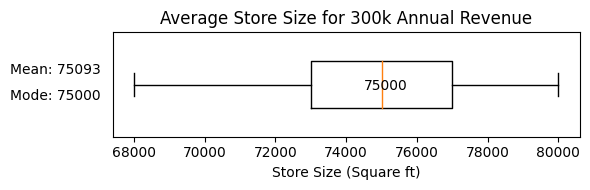

In [18]:
fig = plt.figure(figsize = (6,2))
subplot = fig.add_subplot(111)
subplot.boxplot(boxHist300k['SquareFeet'], vert = 0, widths=0.45)
plt.title('Average Store Size for 300k Annual Revenue')
plt.xlabel('Store Size (Square ft)')
plt.tick_params(left = False, labelleft = False)
plt.text(74500,0.95,int(stats.median(boxHist300k['SquareFeet'])))
plt.text(64500, 1.1, 'Mean: '+str(int(stats.mean(boxHist300k['SquareFeet']))))
plt.text(64500, 0.85, 'Mode: '+str(int(stats.mode(boxHist300k['SquareFeet']))))
plt.tight_layout()
plt.show()

Extra Visualizations for other Revenue Data to also make the smaller stores more cost effective and still have the same Revenue (increasing revenue by lowering operation costs)

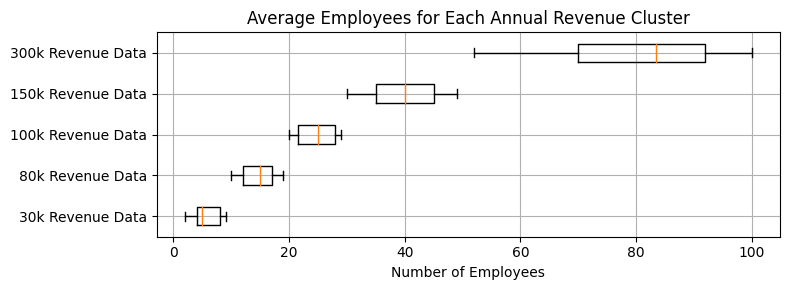

In [19]:
#creating empty dictionary to create loop to fill up with data, adaptable to growing database, would do the same for other visualizations if I had more time
boxStore = {}

#creating "revenueGroups" variable to store all the unique AnnualRevenue Values into an array
revenueGroups = storeSize_vs_NoEmployees_vs_Revenue['AnnualRevenue'].unique()

#creating loop to create dictionary, grouping employees into each revenue cluster
for index, row in storeSize_vs_NoEmployees_vs_Revenue.iterrows():
    if row['AnnualRevenue'] not in boxStore:
        boxStore[row['AnnualRevenue']] = [row['NumberEmployees']]
    else:
        boxStore[row['AnnualRevenue']].append(row['NumberEmployees'])


#now to create the box plot
fig = plt.figure(figsize = (8,3))
revenue150k = fig.add_subplot(111)
revenue150k.boxplot([boxStore[revGroup] for revGroup in revenueGroups], vert = 0, widths=0.45)
plt.title('Average Employees for Each Annual Revenue Cluster')
plt.xlabel('Number of Employees')

#loop for plt.yticks
ytick = []
ytickstr = []
for i in range(len(revenueGroups)):
    ytick.append(int(i+1))
    ytickstr.append(str(int(revenueGroups[i]/1000))+"k Revenue Data")
plt.yticks(ytick,ytickstr)

#making the plot size efficient and more readable
plt.grid()
plt.tight_layout()
plt.show()

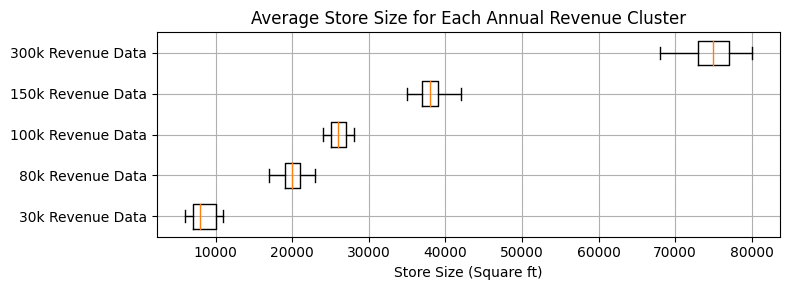

In [20]:
#creating empty dictionary to create loop to fill up with data, adaptable to growing database, would do the same for other visualizations if I had more time
boxStore = {}

#creating "revenueGroups" variable to store all the unique AnnualRevenue Values into an array
revenueGroups = storeSize_vs_NoEmployees_vs_Revenue['AnnualRevenue'].unique()

#creating loop to create dictionary, grouping employees into each revenue cluster
for index, row in storeSize_vs_NoEmployees_vs_Revenue.iterrows():
    if row['AnnualRevenue'] not in boxStore:
        boxStore[row['AnnualRevenue']] = [row['SquareFeet']]
    else:
        boxStore[row['AnnualRevenue']].append(row['SquareFeet'])


#now to create the box plot
fig = plt.figure(figsize = (8,3))
revenue150k = fig.add_subplot(111)
revenue150k.boxplot([boxStore[revGroup] for revGroup in revenueGroups], vert = 0, widths=0.6)
plt.title('Average Store Size for Each Annual Revenue Cluster')
plt.xlabel('Store Size (Square ft)')

#loop for plt.yticks
ytick = []
ytickstr = []
for i in range(len(revenueGroups)):
    ytick.append(int(i+1))
    ytickstr.append(str(int(revenueGroups[i]/1000))+"k Revenue Data")
plt.yticks(ytick,ytickstr)

#making the plot size efficient and more readable
plt.grid()
plt.tight_layout()
plt.show()

Creating a PairGrid instead of PairPlot using Seaborne to be able to edit what goes in the squares, also great for looking for initial relationships when working with multiple variables

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


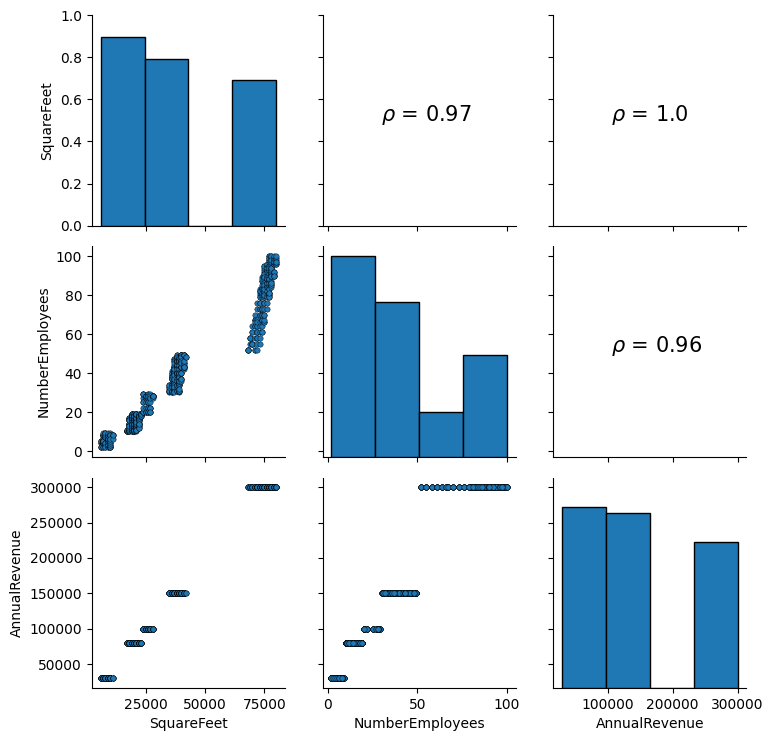

In [21]:
pairGrid = sns.PairGrid(data = storeSize_vs_NoEmployees_vs_Revenue,
                        vars = ['SquareFeet', 'NumberEmployees','AnnualRevenue'])

#correlation function to calculate correlation coefficient between each pair of variables
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 0.5), size = 15, xycoords = ax.transAxes)

pairGrid = pairGrid.map_lower(plt.scatter, s = 15, edgecolor = 'black', linewidths=0.3)
pairGrid = pairGrid.map_upper(corr)
pairGrid = pairGrid.map_diag(plt.hist, bins = 4, edgecolor = 'k')

PairPlot with AnnualRevenue as the hue, another way of visualizing relationships with pairplots

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

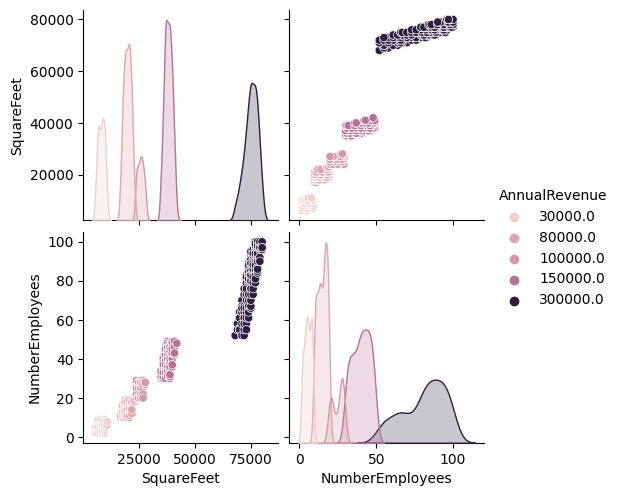

In [22]:
sns.pairplot(storeSize_vs_NoEmployees_vs_Revenue, hue = 'AnnualRevenue')